# Práctica 6

date: 07/11/2023  
File: Chehade_practica6.ipynb
Author : Pablo Naim Chehade   
Email: pablo.chehade.villalba@gmail.com  
GitHub: https://github.com/Lupama2  

## Ejercicio 1

In [47]:
#Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Hago los gráficos interactivos
%matplotlib ipympl

#Fuente y tamaño de los caracteres en los gráficos
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 17}
matplotlib.rc('font', **font)


In [48]:
alpha = 0.12
N = 500

#Calculo p
p = int(alpha*N)
print(f"p = {p}")

def gen_patrones(p, N):
    #Se generan p patrones de N elementos. Se retornan como una matriz
    return np.random.randint(0,2, size = (p, N))*2 - 1

p = 60


In [53]:
#Calculo la matriz de conexiones

def matriz_conexiones(x):
    #x: patrones

    # #Menos eficiente:
    # W = np.zeros((N,N))
    # #Calculo el producto externo
    # for mu in range(p):
    #     W += np.outer(x[mu], x[mu])
    # #Se eliminan las conexiones de la neurona consigo misma
    # W -= np.diag(np.diag(W))

    #De forma más eficiente:
    W = np.einsum('...i,...j->...ij', x, x).sum(axis=0)
    np.fill_diagonal(W, 0)

    return W/x.shape[1]

# matriz_conexiones(gen_patrones(5, 5))

array([[ 0. ,  0.2, -0.6,  0.2,  0.6],
       [ 0.2,  0. ,  0.2,  1. , -0.2],
       [-0.6,  0.2,  0. ,  0.2, -0.2],
       [ 0.2,  1. ,  0.2,  0. , -0.2],
       [ 0.6, -0.2, -0.2, -0.2,  0. ]])

In [50]:
def iter_secuencial_determinista(S_t, W):
    #Calcula S(t+1) dado S(t) de forma secuencial
    for i in range(N):
        S_t[i] = np.sign(np.dot(W[i], S_t))

    return S_t

def iter_paralelo_determinista(S_t, W):
    #Calcula S(t+1) dado S(t) de forma paralela
    S_t = np.sign(np.dot(W, S_t))

    return S_t

#Def la función de Lyapunov
def E_Lyapunov(S, W):
    #S: configuración de la red

    return -1/2*np.sum(W*np.outer(S, S))


In [67]:
#Evoluciono el sistema para dada CI 
N_iter = 100

x = gen_patrones(p, N)
W = matriz_conexiones(x)

error_matrix = np.empty([p, N_iter])
delta_S_matrix = np.empty([p, N_iter - 1])

for mu in range(p):

    S_matrix = np.empty([N_iter, N])
    E_Lyapunov_array = np.empty(N_iter)

    S_matrix[0] = x[mu]
    E_Lyapunov_array[0] = E_Lyapunov(S_matrix[0], W)


    for t in range(1, N_iter):
        S_matrix[t] = iter_secuencial_determinista(S_matrix[t-1], W)
        E_Lyapunov_array[t] = E_Lyapunov(S_matrix[t], W)

    #Para cada t calculo la diferencia entre S_matrix[t] y S_matrix[t-1] y luego el promedio
    delta_S_array = np.mean(np.abs(S_matrix[1:] - S_matrix[:-1]), axis = 1)
    delta_S_matrix[mu] = delta_S_array
    error_array = np.mean(np.abs(S_matrix - S_matrix[0]), axis = 1)
    error_matrix[mu] = error_array

#Calculo el valor medio del error
delta_S_medio = np.mean(delta_S_matrix, axis = 0)
error_medio = np.mean(error_matrix, axis = 0)


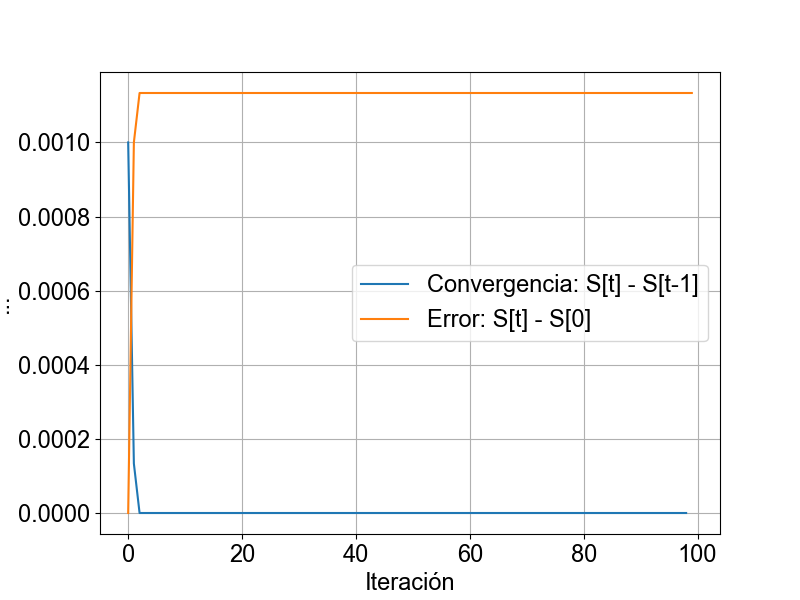

In [68]:
#Grafico E_Lyapunov vs t

fig, ax = plt.subplots(1,1, figsize = (8,6))

# ax.plot(E_Lyapunov_array - 2*np.min(E_Lyapunov_array), 'o-', label = 'Energía de Lyapunov')
ax.plot(delta_S_medio, label = "Convergencia: S[t] - S[t-1]")
ax.plot(error_medio, label = "Error: S[t] - S[0]")
ax.set_xlabel('Iteración')
ax.set_ylabel('...')
# ax.set_yscale("log")
ax.legend()

ax.grid()
plt.show()


## Ejercicio 2